0
Number of layouts: 2

Layout name: Layout1
Layout type: Not available

Layout name: Model
Layout type: Not available
    LWPOLYLINE: Position (9795.0, 9995.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (205.0, 9795.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (5.0, 5.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (205.0, 205.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (5.0, 9700.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (2.5, 100.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (100.0, 2.5, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (2.5, 10100.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (100.0, 10002.5, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9995.0, 9700.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9997.5, 100.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9997.5, 10100.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9527.39, 291.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9060.813, 291.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-8860.813, 646.798, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-8509.925, 2

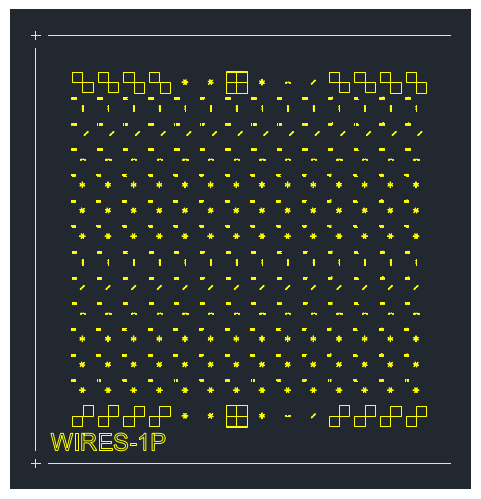

In [16]:
import ezdxf
import os

folder = r'C:\Users\jc2713\OneDrive - Imperial College London (1)\Projects\Japan2024_May_KSAV\Japan_visit\Sample_design\AlexFab'
file = r'Hall-FMR_v2.1-20211117_original.dxf'
path = os.path.join(folder, file)


import sys
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.math import BoundingBox2d
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend

# Safe loading procedure (requires ezdxf v0.14):
try:
    doc, auditor = recover.readfile(path)
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)

def get_entity_position(entity):
    """Get the position of an entity based on its type."""
    if hasattr(entity, 'dxf'):
        if hasattr(entity.dxf, 'insert'):
            return entity.dxf.insert
        elif hasattr(entity.dxf, 'start'):
            return entity.dxf.start
        elif hasattr(entity.dxf, 'center'):
            return entity.dxf.center
        elif hasattr(entity, 'get_points'):
            points = entity.get_points()
            if points:
                return points[0]
    return None

units = doc.header["$INSUNITS"]
print(units)
# Read all layouts
layouts = doc.layouts

print(f"Number of layouts: {len(layouts)}")

# Define the area of interest (adjust these values as needed)
area_of_interest = BoundingBox2d(((-1000000000, -1000000000),(100000000,100000000)))

for layout in layouts:
    print(f"\nLayout name: {layout.name}")
    
    # Try to get the layout type, if available
    try:
        layout_type = layout.dxf.layout_type
        print(f"Layout type: {layout_type}")
    except ezdxf.DXFAttributeError:
        print("Layout type: Not available")
    entities_by_color = {}
    # Get all entities in the layout
    entities = layout.query('*')
    for entity in entities:
        # Check if entity is within the area of interest
        position = get_entity_position(entity)
        if position:
            print(f"    {entity.dxftype()}: Position {position}")
        else:
            print(f"    {entity.dxftype()}: Position not there")
        if position[0] > 0 or position[1]<0:
            layout.delete_entity(entity)    
    #     if hasattr(entity, 'dxf') and hasattr(entity.dxf, 'bbox'):
    #         entity_bbox = entity.dxf.bbox
    #         if entity_bbox and area_of_interest.intersect(entity_bbox):
    #             color = entity.dxf.color
    #             if color not in entities_by_color:
    #                 entities_by_color[color] = []
    #             entities_by_color[color].append(entity)
    #         else:
    #             layout.delete_entity(entity)
    # print(f"Number of entities in this layout: {len(entities)}")
    # # Print information about entities by color
    # print(f"Number of entities after filtering: {sum(len(entities) for entities in entities_by_color.values())}")
    # print("Entities by color:")
    # for color, entities in entities_by_color.items():
    #     print(f"  Color {color}: {len(entities)} entities")
    
    # # Print the types of entities
    # entity_types = set(entity.dxftype() for entity in entities)
    # print("Entity types in this layout:", ", ".join(entity_types))

# The auditor.errors attribute stores severe errors,
# which may raise exceptions when rendering.
if not auditor.has_errors:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
    fig.savefig(os.path.join(folder,'your.png'), dpi=300)





In [112]:
import ezdxf
import os
import math

folder = r'C:\Users\jc2713\OneDrive - Imperial College London (1)\Projects\Japan2024_May_KSAV\Japan_visit\Sample_design\AlexFab'
file = "Hall-FMR_v2.1-20211117_original-OnlyWires.dxf"
path = os.path.join(folder, file)


import sys
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.math import BoundingBox2d, Vec2, Matrix44
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend

# Safe loading procedure (requires ezdxf v0.14):
try:
    doc, auditor = recover.readfile(path)
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)

def get_entity_position(entity):
    """Get the position of an entity based on its type."""
    if hasattr(entity, 'dxf'):
        if hasattr(entity.dxf, 'insert'):
            return entity.dxf.insert
        elif hasattr(entity.dxf, 'start'):
            return entity.dxf.start
        elif hasattr(entity.dxf, 'center'):
            return entity.dxf.center
        elif hasattr(entity, 'get_points'):
            points = entity.get_points()
            if points:
                return points[0]
    return None

units = doc.header["$INSUNITS"]
print(units)
# Read all layouts
layouts = doc.layouts

msp = doc.modelspace()


#print(f"Number of layouts: {len(layouts)}")

# Define the area of interest (adjust these values as needed)
# area_of_interest = BoundingBox2d(((-1000000000, -1000000000),(100000000,100000000)))

# for layout in layouts:
#     #print(f"\nLayout name: {layout.name}")
    
#     # Try to get the layout type, if available
#     try:
#         layout_type = layout.dxf.layout_type
#         #print(f"Layout type: {layout_type}")
#     except ezdxf.DXFAttributeError:
#         print("Layout type: Not available")
#     entities_by_color = {}
#     # Get all entities in the layout
#     entities = layout.query('*')
#     for entity in entities:
#         # Check if entity is within the area of interest
#         position = get_entity_position(entity)
#         if position:
#             pass
#             #print(f"    {entity.dxftype()}: Position {position}")
#         else:
#             print(f"    {entity.dxftype()}: Position not there")
#         if position[0] > 0 or position[1]<0:
#             layout.delete_entity(entity)  


# doc.saveas(os.path.join(folder,"Hall-FMR_v2.1-20211117_original-OnlyWires.dxf"))

def add_rectangle(msp, position, width, height, angle=0, color=1):
    """
    Add a rectangle to the modelspace.
    """
    # print(f"Adding rectangle: position={position}, width={width}, height={height}, angle={angle}")
    half_width = width / 2
    half_height = height / 2
    points = [
        (-half_width, -half_height),
        (half_width, -half_height),
        (half_width, half_height),
        (-half_width, half_height),
        (-half_width, -half_height)
    ]
    rect = msp.add_lwpolyline(points)

    # Rotate rectangle
    angle = math.radians(angle)  # 45 degree rotation
    rotation_matrix = Matrix44.z_rotate(angle)
    rect.transform(rotation_matrix)
     # Translate rectangle to the correct position
    #translation_vector = Vec2(position[0], position[1])
    rect.translate(position[0], position[1], 0)
    
    # Set color
    rect.dxf.color = color
    #rect.tranlate(position[0], position[1], 0)
    
    

def create_unit_cell(msp, origin, cell_size, rectangle_params):
    """
    Create a unit cell with rectangles.
    
    :param msp: Modelspace to add the rectangles to
    :param origin: Tuple (x, y) for the origin of the unit cell
    :param cell_size: Tuple (width, height) of the unit cell
    :param rectangle_params: List of dictionaries, each containing parameters for a rectangle
    """
    for params in rectangle_params:
        # Calculate absolute position within the unit cell
        abs_position = (
            origin[0] + params['position'][0] * cell_size[0],
            origin[1] + params['position'][1] * cell_size[1]
        )
        add_rectangle(msp, abs_position, params['width'], params['height'], params['angle'], params['color'])

def create_array(msp, origin, cell_size, array_size, rectangle_params):
    """
    Create an array of unit cells.
    
    :param msp: Modelspace to add the rectangles to
    :param origin: Tuple (x, y) for the origin of the array
    :param cell_size: Tuple (width, height) of each unit cell
    :param array_size: Tuple (rows, columns) for the number of unit cells
    :param rectangle_params: List of dictionaries, each containing parameters for a rectangle in the unit cell
    """
    for row in range(array_size[0]):
        for col in range(array_size[1]):
            cell_origin = (
                origin[0] + col * cell_size[0],
                origin[1] + row * cell_size[1]
            )
            create_unit_cell(msp, cell_origin, cell_size, rectangle_params)

import random

def add_circle(msp, center, radius, color=7):
    """Add a single circle to the modelspace."""
    msp.add_circle(center, radius, dxfattribs={'color': color})

def add_bar(msp, position, length, width, angle=0, color=7):
    half_width = width / 2
    half_length = length / 2
    rect_corners = half_length - half_width
    points = [
        (-half_length, 0),
        (-rect_corners, -half_width),
        (rect_corners, -half_width),
        (half_length, 0),
        (rect_corners, half_width),
        (-rect_corners, half_width),
        (-half_length, 0)
    ]
    bar = msp.add_lwpolyline(points)
    
    # Rotate bar
    angle_rad = math.radians(angle)
    rotation_matrix = Matrix44.z_rotate(angle_rad)
    bar.transform(rotation_matrix)
    
    # Translate bar to the correct position
    bar.translate(position[0], position[1], 0)
    
    # Set color
    bar.dxf.color = color

def create_bar_array(msp, origin, cell_size, bars_per_cell, bar_lengths, bar_widths, angles, color=7):
    """Create a 2D array of bars with specified parameters."""
    for row in range(bars_per_cell[1]):
        for col in range(bars_per_cell[0]):
            index = row * bars_per_cell[0] + col
            x = origin[0] + col * (cell_size[0] / bars_per_cell[0])
            y = origin[1] + row * (cell_size[1] / bars_per_cell[1])
            position = (x, y)
            length = bar_lengths[index % len(bar_lengths)]
            width = bar_widths[index % len(bar_widths)]
            angle = angles[index % len(angles)]
            add_bar(msp, position, length, width, angle, color)

def create_2d_array_of_bar_arrays(msp, origin, cell_size, grid_size, grid_spacing, bars_per_cell_patterns, bar_length_patterns, bar_width_patterns, angle_patterns, color=7):
    """Create a 2D array of 2D arrays of bars with custom parameters."""
    for row in range(grid_size[1]):
        for col in range(grid_size[0]):
            cell_index = row * grid_size[0] + col
            cell_origin = (
                origin[0] + col * (cell_size[0] + grid_spacing[0]),
                origin[1] + row * (cell_size[1] + grid_spacing[1])
            )
            
            bars_per_cell = bars_per_cell_patterns[cell_index % len(bars_per_cell_patterns)]
            bar_lengths = bar_length_patterns[cell_index % len(bar_length_patterns)]
            bar_widths = bar_width_patterns[cell_index % len(bar_width_patterns)]
            angles = angle_patterns[cell_index % len(angle_patterns)]
            
            create_bar_array(msp, cell_origin, cell_size, bars_per_cell, bar_lengths, bar_widths, angles, color)

def create_circle_array(msp, origin, spacing, num_circles, min_radius, max_radius, rotation_angle=0):
    """Create a 2D array of circles with random radii and rotation."""
    # Create a rotation matrix
    rotation_rad = math.radians(rotation_angle)
    rotation_matrix = ezdxf.math.Matrix44.z_rotate(rotation_rad)
    
    for row in range(num_circles[1]):
        for col in range(num_circles[0]):
            # Calculate position relative to origin
            relative_pos = ezdxf.math.Vec3(col * spacing[0], row * spacing[1], 0)
            # Rotate the position
            rotated_pos = rotation_matrix.transform(relative_pos)
            # Translate to final position
            center = (origin[0] + rotated_pos.x, origin[1] + rotated_pos.y)
            
            radius = random.uniform(min_radius, max_radius)
            add_circle(msp, center, radius)

def create_2d_array_of_circle_arrays(msp, origin, cell_size, grid_size, grid_spacing, circles_per_cell, min_radius, max_radius, rotation_angle=0):
    """Create a 2D array of 2D arrays of circles with custom grid spacing and rotation."""
    for row in range(grid_size[1]):
        for col in range(grid_size[0]):
            cell_origin = (
                origin[0] + col * (cell_size[0] + grid_spacing[0]),
                origin[1] + row * (cell_size[1] + grid_spacing[1])
            )
            circle_spacing = (cell_size[0] / (circles_per_cell[0] + 1), 
                              cell_size[1] / (circles_per_cell[1] + 1))
            create_circle_array(msp, cell_origin, circle_spacing, circles_per_cell, min_radius, max_radius, rotation_angle)

# def create_2d_array_of_bar_arrays(msp, origin, cell_size, grid_size, grid_spacing, bars_per_cell, bar_length, bar_width, angle_patterns, color=7):
#     """Create a 2D array of 2D arrays of bars with custom grid spacing."""
#     for row in range(grid_size[1]):
#         for col in range(grid_size[0]):
#             cell_origin = (
#                 origin[0] + col * (cell_size[0] + grid_spacing[0]),
#                 origin[1] + row * (cell_size[1] + grid_spacing[1])
#             )
#             bar_spacing = (cell_size[0] / (bars_per_cell[0] + 1), 
#                            cell_size[1] / (bars_per_cell[1] + 1))
            
#             # Select an angle pattern for this cell (you can modify this selection logic)
#             cell_angles = angle_patterns[row * grid_size[0] + col]
            
#             create_bar_array(msp, cell_origin, bar_spacing, bars_per_cell, bar_length, bar_width, cell_angles, color)

# Parameters
origin = (-8924, 3496)
cell_size = (50, 10)  # Width of 40, height of 10
grid_size = (14, 1)   # 14 cells horizontally, 1 cell vertically
grid_spacing = (600-cell_size[0], 10)  # 20 units horizontal spacing, 10 units vertical spacing between cells
circles_per_cell = (50, 10)  # 4 circles horizontally, 2 circles vertically in each cell
min_radius = 0.1
max_radius = 0.4
rotation_angle = 0  # Rotation angle in degrees

# First array
# Create the 2D array of 2D arrays of circles
create_2d_array_of_circle_arrays(msp, origin, cell_size, grid_size, grid_spacing, circles_per_cell, min_radius, max_radius,rotation_angle)
rotation_angle = 45  # Rotation angle in degrees
origin = (-8924+10, 3496+600-16)
create_2d_array_of_circle_arrays(msp, origin, cell_size, grid_size, grid_spacing, circles_per_cell, min_radius, max_radius,rotation_angle)
rotation_angle = 90  # Rotation angle in degrees
origin = (-8924+30-2., 3496+1200-20)
create_2d_array_of_circle_arrays(msp, origin, cell_size, grid_size, grid_spacing, circles_per_cell, min_radius, max_radius,rotation_angle)


# Second array
# Parameters
# Parameters
origin = (-8924, 3496)
cell_size = (49, 9)  # Width of 40, height of 10
grid_size = (14, 1)   # 14 cells horizontally, 1 cell vertically
grid_spacing = (600-cell_size[0], 10)  # 20 units horizontal spacing, 10 units vertical spacing between cells
bars_per_cell = (49, 9)  # 4 circles horizontally, 2 circles vertically in each cell
rotation_angle = 0  # Rotation angle in degrees
bar_length = 0.6
bar_width = 0.1
color = 1  # Red in AutoCAD color index

import numpy as np

# Define patterns
bars_per_cell_patterns = [
    (50, 10),
    (40, 8),
    (30, 6),
    (50, 10),
    (40, 8),
    (30, 6),
    (50, 10),
    (40, 8),
    (30, 6),
    (50, 10),
    (40, 8),
    (30, 6),
    (50, 10),
    (40, 8),
    (30, 6),
    (50, 10),
    (40, 8)
]

bar_length_patterns = [
    np.linspace(0.1, 0.6, 500),
    np.linspace(0.2, 0.8, 320),
    np.linspace(0.3, 1, 180),
    np.linspace(0.1, 0.6, 500),
    np.linspace(0.2, 0.8, 320),
    np.linspace(0.3, 1, 180),
    np.linspace(0.1, 0.6, 500),
    np.linspace(0.2, 0.8, 320),
    np.linspace(0.3, 1, 180),
    np.linspace(0.1, 0.6, 500),
    np.linspace(0.2, 0.8, 320),
    np.linspace(0.3, 1, 180),
    np.linspace(0.1, 0.6, 500),
    np.linspace(0.2, 0.8, 320)
]

bar_width_patterns = [
    np.full(500, 0.1),
    np.full(320, 0.2),
    np.full(180, 0.3),
    np.full(500, 0.1),
    np.full(320, 0.2),
    np.full(180, 0.3),
    np.full(500, 0.1),
    np.full(320, 0.2),
    np.full(180, 0.3),
    np.full(500, 0.1),
    np.full(320, 0.2),
    np.full(180, 0.3),
    np.full(500, 0.1),
    np.full(320, 0.2)
]


# Define multiple angle patterns for different cells
angle_patterns = [
    np.repeat(np.linspace(0,90,10),50),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10),
    np.repeat(np.linspace(0,90,50),10)]
#     [[0, 45, 90, 135]] * 4,  # Pattern 1
#     [[0, 90, 0, 90]] * 4,    # Pattern 2
#     [[0, 30, 60, 90]] * 4,   # Pattern 3
#     [[45, 45, 45, 45]] * 4,  # Pattern 4
#     [[0, 45, 90, 135],       # Pattern 5 (different angles in rows)
#      [135, 90, 45, 0],
#      [0, 90, 0, 90],
#      [45, 45, 45, 45]]
# ]

def add_wide_line(msp, start, end, width, color=1):
    points = [start, end]
    polyline = msp.add_lwpolyline(points)
    polyline.dxf.const_width = width
    polyline.dxf.color = color

def create_fractal_branch(msp, start, angle, length, width, depth, max_depth, branching_angle):
    if depth > max_depth or length < 0.5:
        return

    # Calculate end point
    end_x = start[0] + length * math.cos(math.radians(angle))
    end_y = start[1] + length * math.sin(math.radians(angle))
    end = (end_x, end_y)

    # Draw the branch
    points = [start, end]
    polyline = msp.add_lwpolyline(points)
    polyline.dxf.const_width = width
    polyline.dxf.color = 1  # Red color

    # Create two smaller branches
    new_length = length * 0.7
    new_width = width * 0.7
    create_fractal_branch(msp, end, angle + branching_angle, new_length, new_width, depth + 1, max_depth, branching_angle)
    create_fractal_branch(msp, end, angle - branching_angle, new_length, new_width, depth + 1, max_depth, branching_angle)

def create_fractal_dendrite(doc, origin, length, width, max_depth, branching_angle):
    msp = doc.modelspace()
    
    # Create the main branch
    create_fractal_branch(msp, origin, 0, length, width, 0, max_depth, branching_angle)

    # Create additional main branches for more complexity
    num_additional_branches = 0
    for i in range(num_additional_branches):
        angle = (i + 1) * (90 / (num_additional_branches + 1))
        create_fractal_branch(msp, origin, angle, length * 0.8, width * 0.8, 0, max_depth - 1, branching_angle)
        create_fractal_branch(msp, origin, -angle, length * 0.8, width * 0.8, 0, max_depth - 1, branching_angle)

# def create_dendrite(msp, start, end, width, branches, angle_range, min_length, min_width=0.1, depth=0, max_depth=10):
#     if depth > max_depth or (end[0] - start[0]) < min_length or width < min_width:
#         return

#     # Add the main branch
#     add_wide_line(msp, start, end, width)

#     # Create sub-branches
#     for _ in range(branches):
#         branch_start = (start[0] + (end[0] - start[0]) * random.uniform(0.3, 0.7),
#                         start[1] + (end[1] - start[1]) * random.uniform(0.3, 0.7))
        
#         # Ensure the branch end is always to the right of its start
#         branch_length = (end[0] - branch_start[0]) * random.uniform(0.5, 0.8)
#         branch_angle = random.uniform(-angle_range, angle_range)
        
#         branch_end = (branch_start[0] + branch_length * math.cos(math.radians(branch_angle)),
#                       branch_start[1] + branch_length * math.sin(math.radians(branch_angle)))
        
#         # Ensure the branch doesn't exceed the total width
#         if abs(branch_end[1] - start[1]) <= width / 2:
#             create_dendrite(msp, branch_start, branch_end, width * 0.7, 
#                             max(1, branches - 1), angle_range, min_length, min_width, depth + 1, max_depth)

# def create_dendritic_structure(doc, origin, total_length, total_width, connectiveness, initial_width, min_length=1, min_width=0.1):
#     msp = doc.modelspace()
    
#     main_branches = int(connectiveness * 10)  # Scale connectiveness to a reasonable number of branches
#     angle_range = 30  # Degrees, reduced to make it more directional
    
#     for _ in range(main_branches):
#         start = (origin[0], origin[1] + random.uniform(-total_width/2, total_width/2))
#         end = (origin[0] + total_length, start[1] + random.uniform(-total_width/4, total_width/4))
#         create_dendrite(msp, start, end, initial_width, int(connectiveness * 5), angle_range, min_length, min_width)
# Parameters
# origin = (0, 0)  # Center of the dendritic structure
origin = (-8924, 3496+3600+5)
# Parameters
# Parameters
#origin = (0, 0)  # Starting point of the dendritic structure
length = 40/(1+0.7+0.7**3+0.7**4+0.7**5+0.7**6+0.7**7+0.7**8)  # Length of the main branch
width = 1  # Width of the main branch
max_depth = 15  # Maximum recursion depth
branching_angle = 8  # Angle between branches

# Create the fractal dendrite
create_fractal_dendrite(doc, origin, length, width, max_depth, branching_angle)

# Create the 2D array of 2D arrays of bars
#origin = (-8924, 3496+3600)
#rotation_angle = 0
#create_2d_array_of_bar_arrays(msp, origin, cell_size, grid_size, grid_spacing, bars_per_cell_patterns, bar_length_patterns, bar_width_patterns, angle_patterns, color)

# Create the 2D array of 2D arrays of circles
#origin = (-8924, 3496+3600)
#rotation_angle = 0
#create_2d_array_of_circle_arrays(msp, origin, cell_size, grid_size, grid_spacing, circles_per_cell, min_radius, max_radius,rotation_angle)
rotation_angle = 45  # Rotation angle in degrees
origin = (-8924+10+90, 3496+600-16+3600)
create_2d_array_of_circle_arrays(msp, origin, cell_size, grid_size, grid_spacing, circles_per_cell, min_radius, max_radius,rotation_angle)
rotation_angle = 90  # Rotation angle in degrees
origin = (-8924+30-2., 3496+1200-20+3600)
create_2d_array_of_circle_arrays(msp, origin, cell_size, grid_size, grid_spacing, circles_per_cell, min_radius, max_radius,rotation_angle)

# Create a new DXF document
#doc = ezdxf.new('R2010')
#msp = doc.modelspace()

cell_size = (600, 600)  # 10x10 unit cell
rectangle_params = [
    {'position': (0, 0), 'width': 20, 'height': 130, 'angle': 90, 'color': 3},
    {'position': (0, 1), 'width': 20, 'height': 130, 'angle': -45, 'color': 3},
    {'position': (0, 2), 'width': 20, 'height': 130, 'angle': 0, 'color': 3},
    {'position': (0, 6), 'width': 20, 'height': 130, 'angle': 90, 'color': 3},
    {'position': (0.15, 7), 'width': 20, 'height': 130, 'angle': -45, 'color': 3},
    {'position': (0, 8), 'width': 20, 'height': 130, 'angle': 0, 'color': 3}
]

# Define the unit cell
#cell_size = (10, 10)  # 10x10 unit cell
#rectangle_params = [
#    {'position': (-9400, 2400), 'width': 10, 'height': 40, 'angle': 0, 'color': 1},
#    {'position': (-9400, 3000), 'width': 10, 'height': 40, 'angle': 45, 'color': 2},
#    {'position': (-9400, 3600), 'width': 10, 'height': 40, 'angle': 90, 'color': 3}
#]

# Create an array of 5x5 unit cells
array_origin = (-8900, 3500)
array_size = (1, 14)

create_array(msp, array_origin, cell_size, array_size, rectangle_params)
# Set view extents
# Calculate extents after creating the array
min_x, min_y = float('inf'), float('inf')
max_x, max_y = float('-inf'), float('-inf')

for entity in msp:
    if isinstance(entity, ezdxf.entities.LWPolyline):
        for point in entity.get_points():
            # LWPolyline points can have 2 or 3 coordinates (x, y) or (x, y, z)
            x, y = point[:2]  # Take only the first two coordinates
            min_x = min(min_x, x)
            min_y = min(min_y, y)
            max_x = max(max_x, x)
            max_y = max(max_y, y)

# Add some padding
padding = 1000  # Adjust this value as needed
min_x -= padding
min_y -= padding
max_x += padding
max_y += padding

# Save the document
doc.saveas(os.path.join(folder,"new_drawing.dxf"))
plot = False
if not auditor.has_errors and plot:
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)
    
    # Set plot limits based on calculated extents
    ax.set_xlim(-9400, 0)
    #ax.set_ylim(3000, 6000)
    
    # Ensure equal aspect ratio
    #ax.set_aspect('equal', 'datalim')
    
    fig.savefig(os.path.join(folder, 'your.png'), dpi=300, bbox_inches='tight')
# if not auditor.has_errors:
#     fig = plt.figure()
#     ax = fig.add_axes([0, 0, 1, 1])
#     ctx = RenderContext(doc)
#     out = MatplotlibBackend(ax)
#     Frontend(ctx, out).draw_layout(msp, finalize=True)
#     fig.savefig(os.path.join(folder,'your.png'), dpi=300)

0


In [ ]:
class Grid:
    def __init__(self, width, height, cell_size):
        self.width = width
        self.height = height
        self.cell_size = cell_size
        self.grid = [[False for _ in range(int(height / cell_size))] for _ in range(int(width / cell_size))]

    def occupy(self, x, y):
        grid_x = int(x / self.cell_size)
        grid_y = int(y / self.cell_size)
        if 0 <= grid_x < len(self.grid) and 0 <= grid_y < len(self.grid[0]):
            self.grid[grid_x][grid_y] = True

    def is_occupied(self, x, y):
        grid_x = int(x / self.cell_size)
        grid_y = int(y / self.cell_size)
        if 0 <= grid_x < len(self.grid) and 0 <= grid_y < len(self.grid[0]):
            return self.grid[grid_x][grid_y]
        return True  # Treat out-of-bounds as occupied

def create_fractal_branch(msp, start, angle, length, width, depth, max_depth, branching_angle, grid):
    if depth > max_depth or length < 1:
        return

    # Calculate end point
    end_x = start[0] + length * math.cos(math.radians(angle))
    end_y = start[1] + length * math.sin(math.radians(angle))
    end = (end_x, end_y)

    # Check if the path is clear
    steps = int(length / grid.cell_size)
    for i in range(steps):
        check_x = start[0] + i * (end_x - start[0]) / steps
        check_y = start[1] + i * (end_y - start[1]) / steps
        if grid.is_occupied(check_x, check_y):
            return  # Path is blocked, don't create this branch

    # Draw the branch
    points = [start, end]
    polyline = msp.add_lwpolyline(points)
    polyline.dxf.const_width = width
    polyline.dxf.color = 1  # Red color

    # Mark the path as occupied
    for i in range(steps):
        occupy_x = start[0] + i * (end_x - start[0]) / steps
        occupy_y = start[1] + i * (end_y - start[1]) / steps
        grid.occupy(occupy_x, occupy_y)

    # Create two smaller branches
    new_length = length * 0.7
    new_width = width * 0.7
    create_fractal_branch(msp, end, angle + branching_angle, new_length, new_width, depth + 1, max_depth, branching_angle, grid)
    create_fractal_branch(msp, end, angle - branching_angle, new_length, new_width, depth + 1, max_depth, branching_angle, grid)

def create_fractal_dendrite(doc, origin, length, width, max_depth, branching_angle):
    msp = doc.modelspace()
    
    # Create a grid to track occupied space
    grid = Grid(length * 3, length * 3, width / 2)
    
    # Create the main branch
    create_fractal_branch(msp, origin, 0, length, width, 0, max_depth, branching_angle, grid)

    # Create additional main branches for more complexity
    num_additional_branches = 3
    for i in range(num_additional_branches):
        angle = (i + 1) * (90 / (num_additional_branches + 1))
        create_fractal_branch(msp, origin, angle, length * 0.8, width * 0.8, 0, max_depth - 1, branching_angle, grid)
        create_fractal_branch(msp, origin, -angle, length * 0.8, width * 0.8, 0, max_depth - 1, branching_angle, grid)